
# **EXPLORATORY DATA ANALYSIS**



In [2]:
import pandas as pd 
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data = pd.read_csv('/content/drive/MyDrive/data/pokemon.csv') #pokemon.csv datası dataframe'e çevrilir.

In [4]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


**value_count()** methodu bir sütundaki verilerden kaç tane olduğunu gösterir. Bu method kullanılırken **dropna = False** denildiğinde missing datalar da sayılır.

In [5]:
print(data['Type 1'].value_counts(dropna =False)) 

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [12]:
data.isnull().sum().sort_values(ascending=False) #eksik değerlerin sayısı azalan şekilde sıralanır. 

Type 2        386
Name            1
#               0
Type 1          0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**outlier** ayrık, aykırı demektir. Outlier değerler verilerin geri kalanından önemli ölçüde daha yüksek ya da daha düşüktür.

In [6]:
liste = np.array([1,4,5,6,8,9,11,12,13,14,15,16,17])

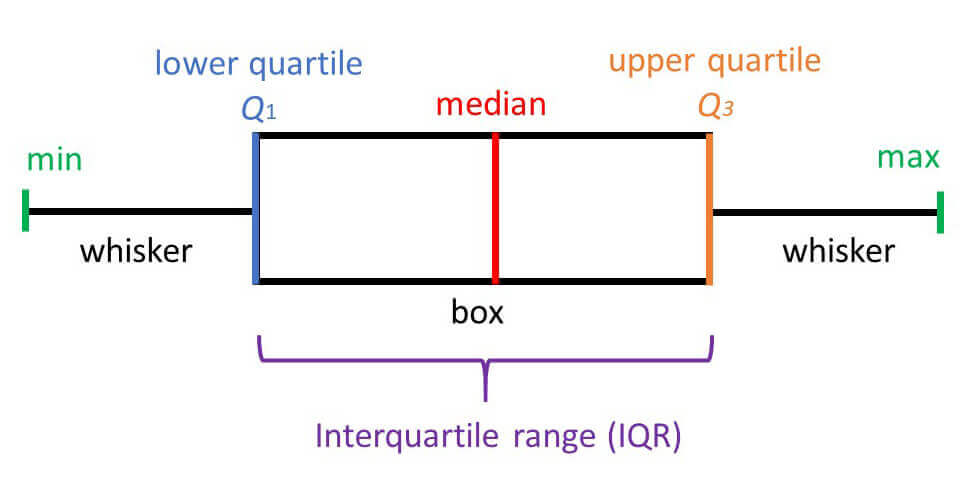

 

*   **Median** değeri listenin ortasındaki sayıdır ve second quantile (50%) olarak da adlandırılır.
*   **Lower quartile** listedeki en küçük sayı ile listenin medianının ortasındaki sayıdır, first quantile (25%) olarak da adlandırılır.
*   **Upper quartile** listenin medianı ile listedeki en büyük sayının ortasındaki sayıdır, third quantile (75%) olarak da adlandırılır.
*   Lower quartile(Q1) ile upper quartile(Q3) arasındaki mesafe **interquartile range**'dir. 
*   Q1 - 1.5(Q3-Q1) değerinin altındaki değerler listedeki minimum değerin altında kalır ve outlierdır.
*   Q3 + 1.5(Q3-Q1). (Q3-Q1) değerinin üstündeki değerler listedeki maximum değerin üstünde kalır ve outlierdır.









In [7]:
from numpy import median
median(liste)

11.0

In [8]:
print("median or second quantile(50%) : ", np.quantile(liste, .50))
print("first quantile(%25) : ", np.quantile(liste, .25))
print("third quantile(%75) : ", np.quantile(liste, .75))

median or second quantile(50%) :  11.0
first quantile(%25) :  6.0
third quantile(%75) :  14.0


describe methodunda ;
*   Sayısal değer barındıran sütunların istatiksel özeti hesaplanır.
*   count dataframedeki samplelardır.
*   mean ortalama değerdir.
*   min, max, standart sapma, median, lower quartile, upper quartile hesaplanır.





In [9]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


describe methodu string veri barındıran sütunlara da uygulanabilir.

*   **count**: NaN olmayan veri sayısı
*  **unique**: Birbirinden farklı kaç kategori olduğunun bilgisi
*   **top** : Sütunda en çok bulunan kategorinin adı.
*   **freq** : En çok bulunan kategorinin sütunda bulunma sıklığı





In [13]:
data["Name"].describe()

count           799
unique          799
top       Bulbasaur
freq              1
Name: Name, dtype: object

describe string veri bulunduran sütunlarda uygulanmak istenildiğinde **['O']** parametresi kullanılır.

In [14]:
data.describe(include=['O'])

,Name,Type 1,Type 2
count,799,800,414
unique,799,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97
